In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.shape

(32581, 12)

In [5]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


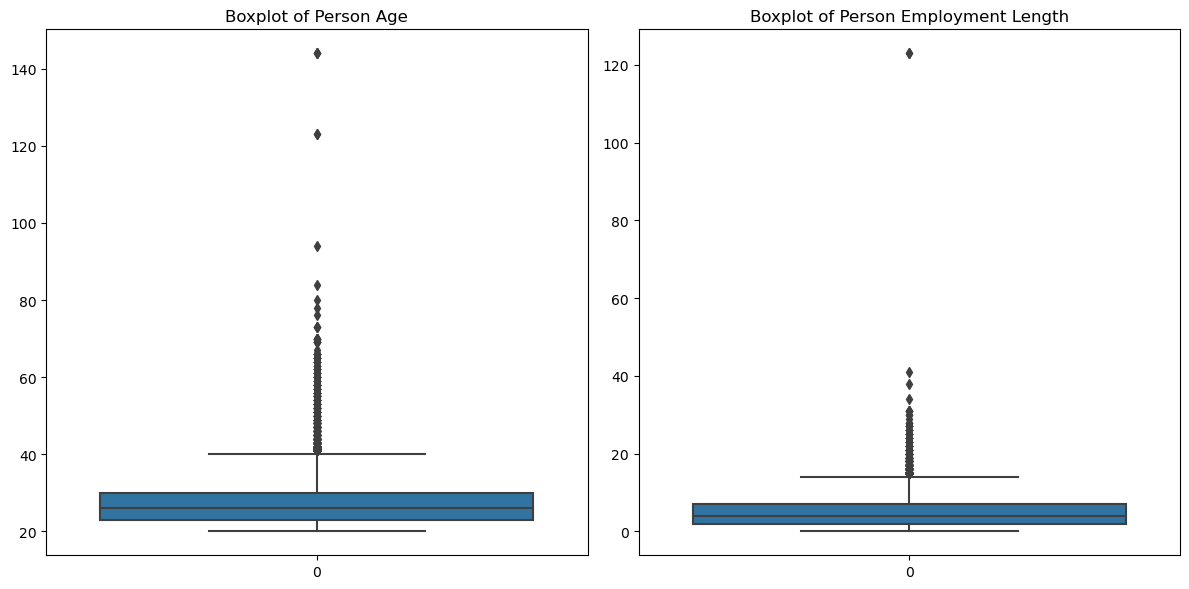

In [7]:
#visualizing outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(df['person_age'])
plt.title('Boxplot of Person Age')

plt.subplot(1, 2, 2)
sns.boxplot(df['person_emp_length'])
plt.title('Boxplot of Person Employment Length')

plt.tight_layout()
plt.show()


In [8]:
#removing outliers
Q1_age = df['person_age'].quantile(0.25)
Q3_age = df['person_age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
age_lower_bound = Q1_age - 1.5 * IQR_age
age_upper_bound = Q3_age + 1.5 * IQR_age

Q1_emp = df['person_emp_length'].quantile(0.25)
Q3_emp = df['person_emp_length'].quantile(0.75)
IQR_emp = Q3_emp - Q1_emp
emp_lower_bound = Q1_emp - 1.5 * IQR_emp
emp_upper_bound = Q3_emp + 1.5 * IQR_emp

df = df[(df['person_age'] >= age_lower_bound) & (df['person_age'] <= age_upper_bound)]
df = df[(df['person_emp_length'] >= emp_lower_bound) & (df['person_emp_length'] <= emp_upper_bound)]


In [9]:
df.shape

(29531, 12)

In [10]:
df.describe(include=['object'])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,29531,29531,29531,29531
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,15170,5982,9638,24280


In [11]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2820
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [12]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)


In [13]:
df['loan_int_rate'] = df.groupby('loan_grade')['loan_int_rate'].transform(lambda x: x.fillna(x.median()))


In [14]:
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)

In [15]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['loan_status'].sort_values(ascending=False)
print(correlation_with_target)

loan_status                    1.000000
loan_percent_income            0.380350
loan_int_rate                  0.335919
loan_grade_D                   0.320625
person_home_ownership_RENT     0.233893
loan_grade_E                   0.182831
cb_person_default_on_file_Y    0.179889
loan_amnt                      0.108581
loan_grade_F                   0.102358
loan_grade_G                   0.083178
loan_intent_MEDICAL            0.055965
loan_intent_HOMEIMPROVEMENT    0.038663
person_home_ownership_OTHER    0.014305
loan_grade_C                  -0.013649
loan_intent_PERSONAL          -0.017663
cb_person_cred_hist_length    -0.020884
person_age                    -0.028493
loan_intent_EDUCATION         -0.060603
loan_intent_VENTURE           -0.073975
person_emp_length             -0.090300
loan_grade_B                  -0.096019
person_home_ownership_OWN     -0.101461
person_income                 -0.184866
Name: loan_status, dtype: float64


In [16]:
# Debt-to-Income Ratio
df['DTI'] = df['loan_amnt'] / df['person_income']

# Age to Credit History Length Ratio
df['age_to_cred_hist_ratio'] = df['person_age'] / df['cb_person_cred_hist_length']

# Loan Amount to Age Ratio
df['loan_to_age_ratio'] = df['loan_amnt'] / df['person_age']

# Creating an interaction feature to capture combined effect of borrower's income and loan amount.
df['income_loan_interaction'] = df['person_income'] * df['loan_amnt']


In [17]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,DTI,age_to_cred_hist_ratio,loan_to_age_ratio,income_loan_interaction
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,0,0,0,0.104167,10.500000,47.619048,9600000
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,0,0,0.572917,8.333333,220.000000,52800000
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,0,0,0.534351,11.500000,1521.739130,2292500000
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,0,1,0.643382,6.000000,1458.333333,1904000000
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,0,0,0,0,0.252525,10.500000,119.047619,24750000


In [18]:
df.duplicated().sum()

153

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
# Defining the base names for columns to automatically detect related columns in the dataframe
base_columns = ['person_emp_length', 'loan_intent_', 'loan_grade_', 'person_home_ownership_']

# Identifying all related columns based on the base names
columns_to_check = [col for col in df.columns if any(base in col for base in base_columns)]

for column in columns_to_check:
    print(f"Unique values for {column}:")
    print(df[column].unique())
    print("-" * 50)


Unique values for person_emp_length:
[ 5.  1.  4.  8.  2.  6.  7.  0.  9.  3. 10. 11. 12. 14. 13.]
--------------------------------------------------
Unique values for person_home_ownership_OTHER:
[0 1]
--------------------------------------------------
Unique values for person_home_ownership_OWN:
[1 0]
--------------------------------------------------
Unique values for person_home_ownership_RENT:
[0 1]
--------------------------------------------------
Unique values for loan_intent_EDUCATION:
[1 0]
--------------------------------------------------
Unique values for loan_intent_HOMEIMPROVEMENT:
[0 1]
--------------------------------------------------
Unique values for loan_intent_MEDICAL:
[0 1]
--------------------------------------------------
Unique values for loan_intent_PERSONAL:
[0 1]
--------------------------------------------------
Unique values for loan_intent_VENTURE:
[0 1]
--------------------------------------------------
Unique values for loan_grade_B:
[1 0]
------------

In [21]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [22]:
continuous_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']

for feature in continuous_features:
    print(f"{feature} - Skewness: {df[feature].skew()}, Kurtosis: {df[feature].kurt()}")


person_age - Skewness: 1.0024894136963174, Kurtosis: 0.3444273569766847
person_income - Skewness: 5.439959693786381, Kurtosis: 72.8649091177619
loan_amnt - Skewness: 1.1839810526547592, Kurtosis: 1.4072741740952694
loan_int_rate - Skewness: 0.19993244262529508, Kurtosis: -0.6695653981188907


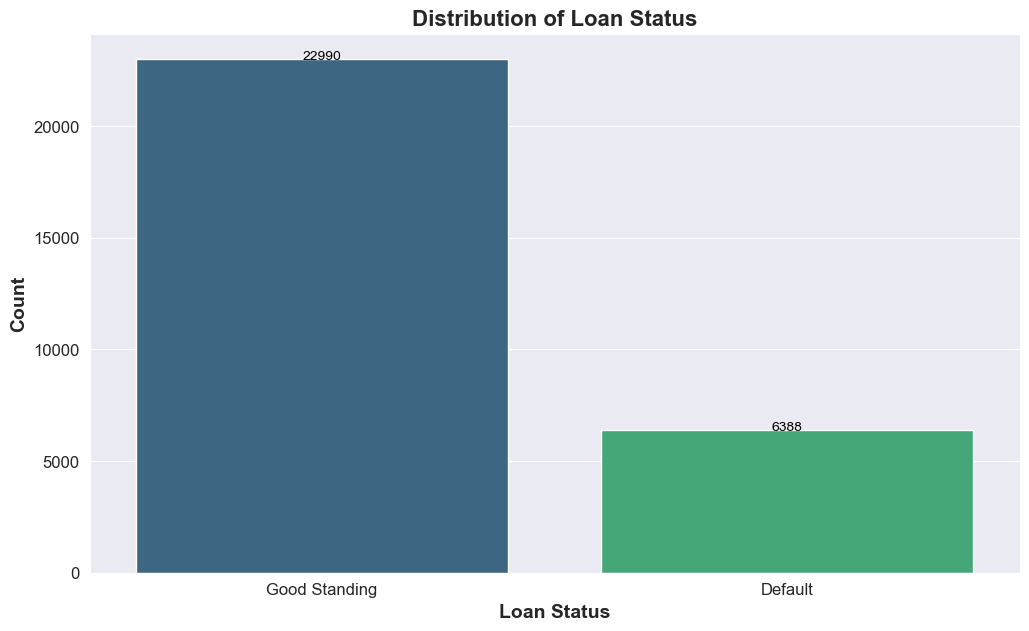

In [23]:
sns.set_style('darkgrid')

plt.figure(figsize=(12, 7))

ax = sns.countplot(x='loan_status', data=df, palette="viridis")

ax.set_xticklabels(['Good Standing', 'Default'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, 
            '{:1.0f}'.format(height), 
            ha="center", color="black")

plt.title('Distribution of Loan Status', fontweight='bold', fontsize=16)
plt.xlabel('Loan Status', fontweight='bold', fontsize=14)
plt.ylabel('Count', fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

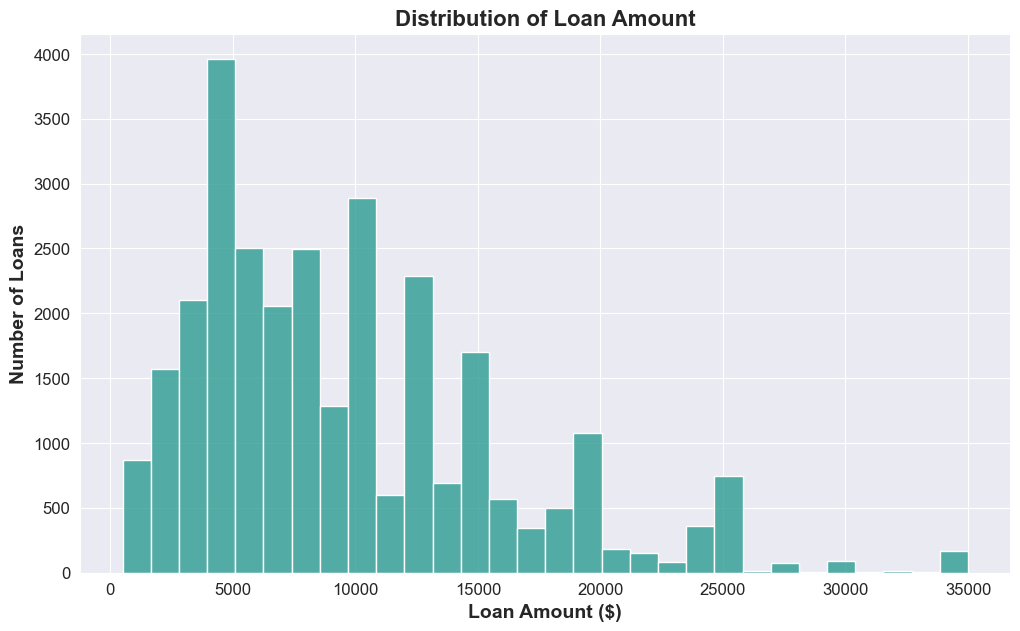

In [24]:
plt.figure(figsize=(12, 7))

sns.histplot(df['loan_amnt'], bins=30, color="#1F968B") 

plt.title('Distribution of Loan Amount', fontweight='bold', fontsize=16)
plt.xlabel('Loan Amount ($)', fontweight='bold', fontsize=14)
plt.ylabel('Number of Loans', fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

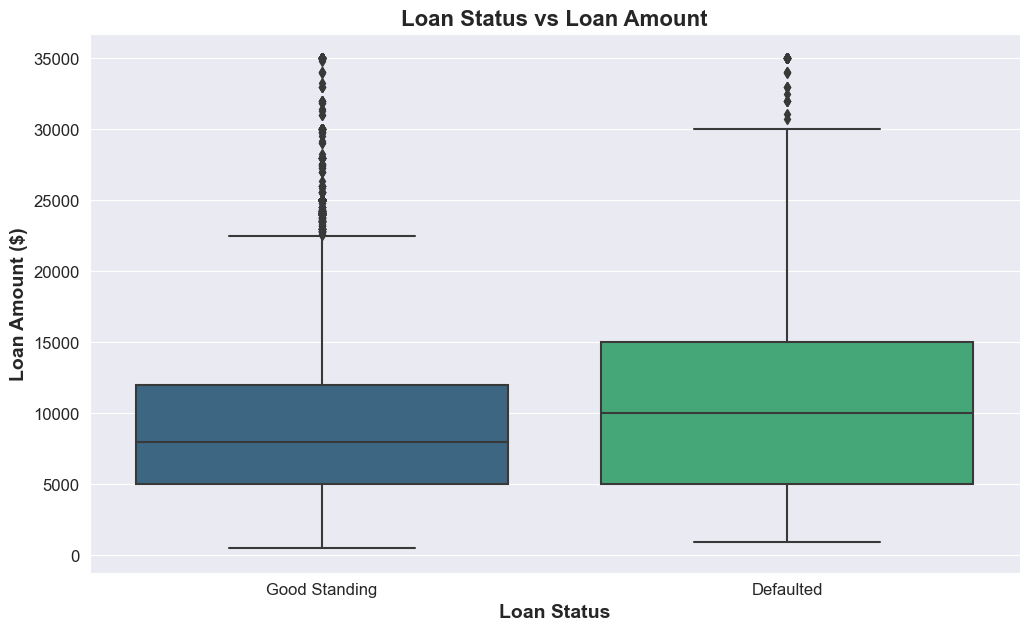

In [25]:
plt.figure(figsize=(12, 7))

sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette="viridis")

plt.title('Loan Status vs Loan Amount', fontweight='bold', fontsize=16)
plt.xlabel('Loan Status', fontweight='bold', fontsize=14)
plt.ylabel('Loan Amount ($)', fontweight='bold', fontsize=14)
plt.xticks([0, 1], ['Good Standing', 'Defaulted'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

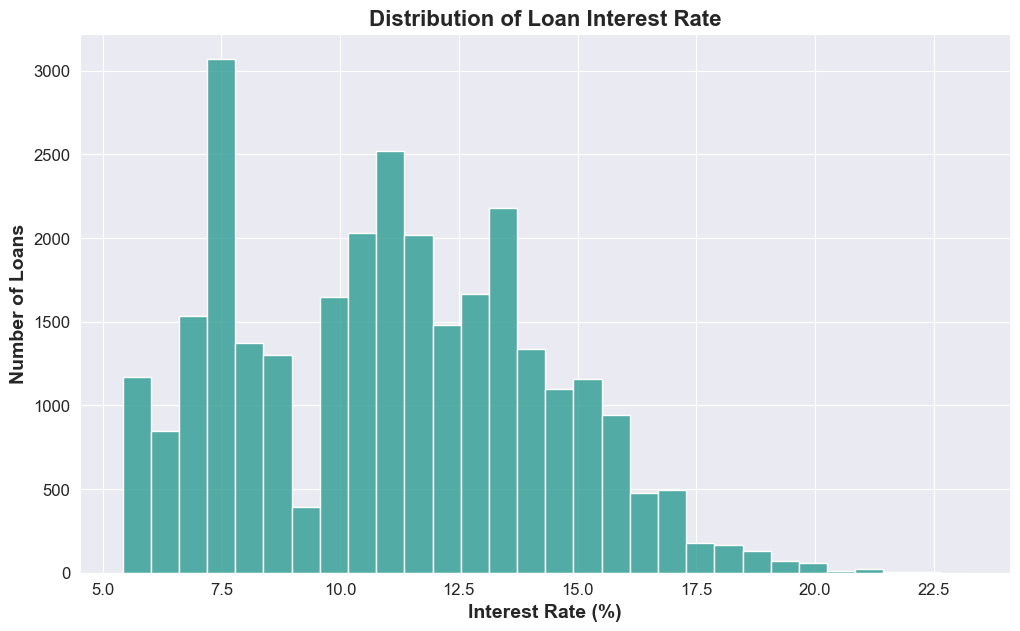

In [26]:
plt.figure(figsize=(12, 7))

sns.histplot(df['loan_int_rate'], bins=30, color="#1F968B")

plt.title('Distribution of Loan Interest Rate', fontweight='bold', fontsize=16)
plt.xlabel('Interest Rate (%)', fontweight='bold', fontsize=14)
plt.ylabel('Number of Loans', fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


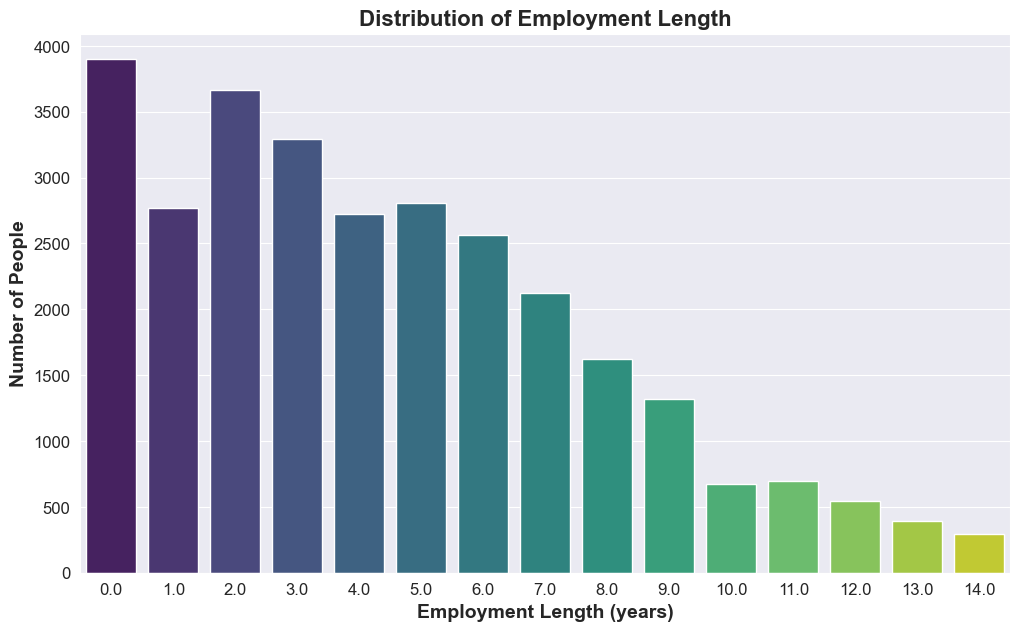

In [27]:
plt.figure(figsize=(12, 7))

sns.countplot(data=df, x='person_emp_length', palette='viridis')

plt.title('Distribution of Employment Length', fontweight='bold', fontsize=16)
plt.xlabel('Employment Length (years)', fontweight='bold', fontsize=14)
plt.ylabel('Number of People', fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


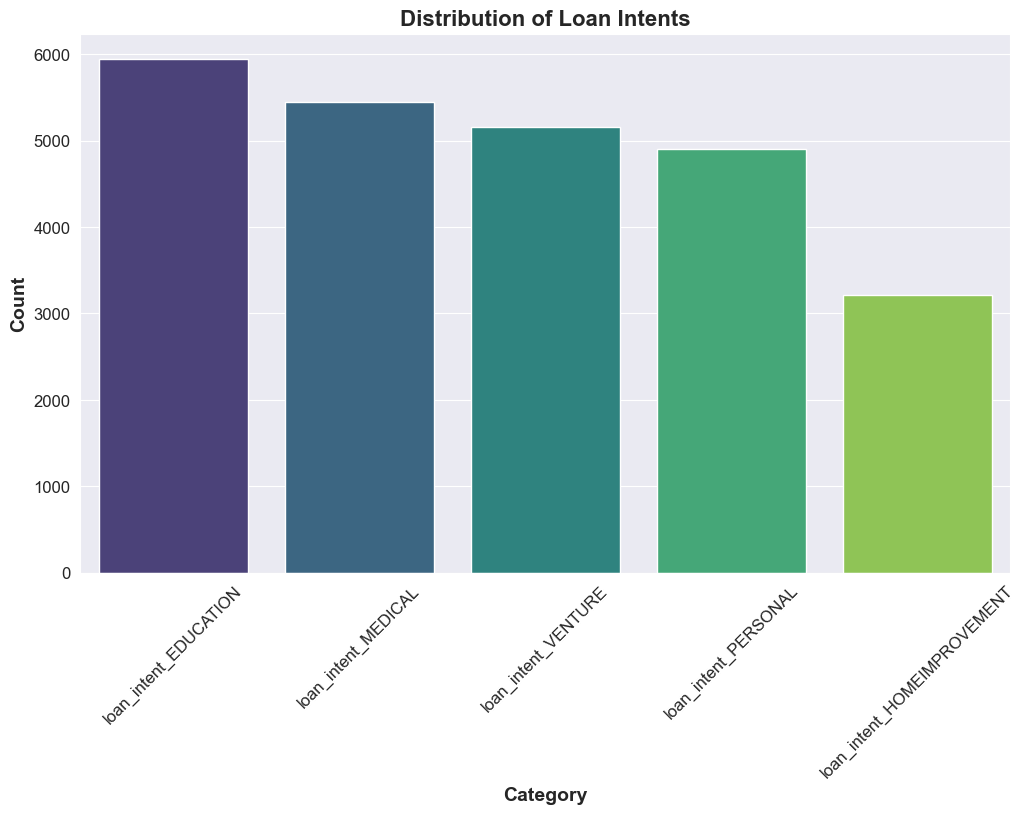

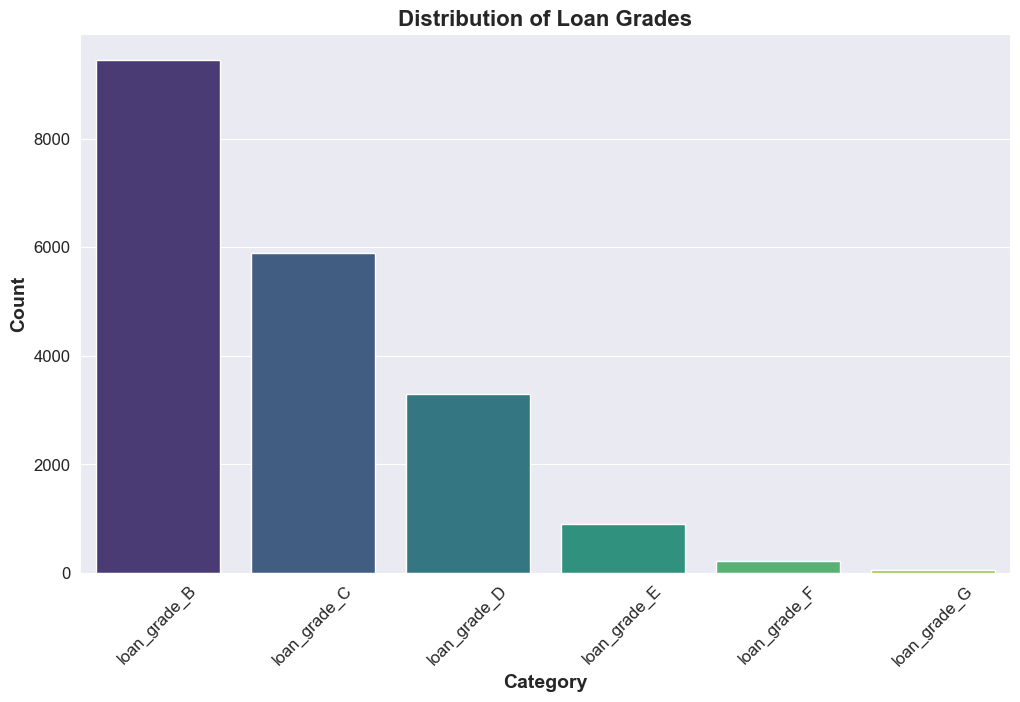

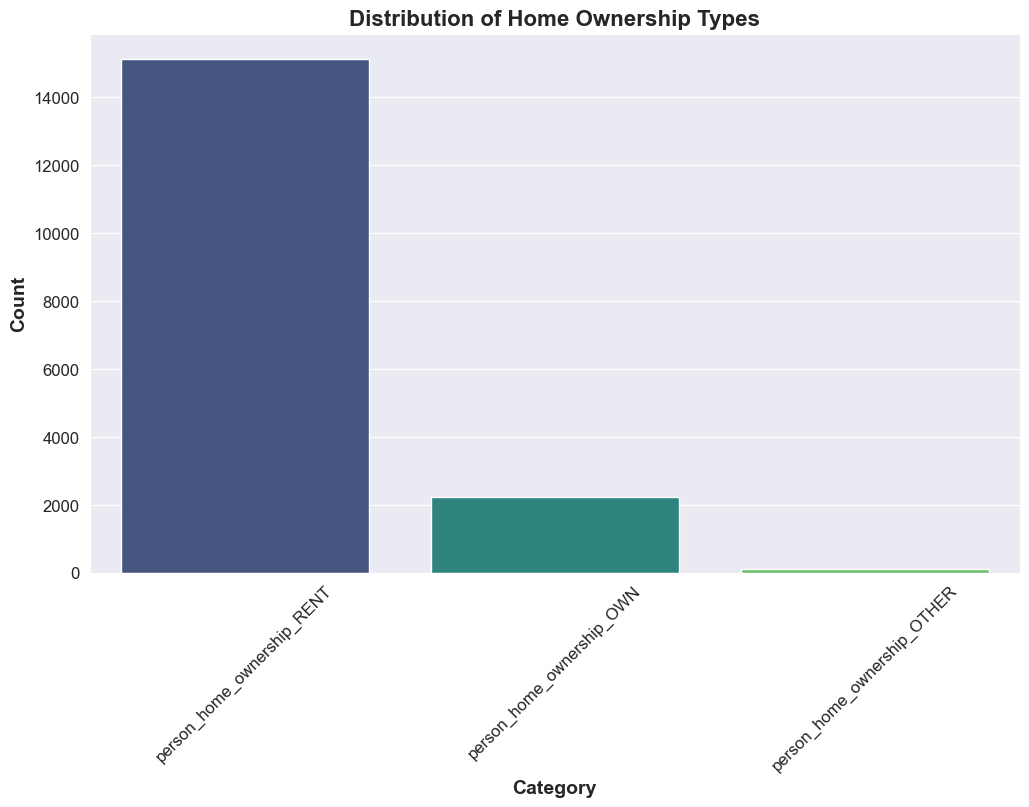

In [28]:
loan_intent_columns = ['loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 
                       'loan_intent_PERSONAL', 'loan_intent_VENTURE']

loan_grade_columns = ['loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G']

home_ownership_columns = ['person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT']

def plot_distributions(columns, title):
    plt.figure(figsize=(12, 7))
    data = df[columns].sum().sort_values(ascending=False)
    
    sns.barplot(x=data.index, y=data.values, palette='viridis')
    
    plt.title(title, fontweight='bold', fontsize=16)
    plt.xlabel('Category', fontweight='bold', fontsize=14)
    plt.ylabel('Count', fontweight='bold', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

plot_distributions(loan_intent_columns, "Distribution of Loan Intents")
plot_distributions(loan_grade_columns, "Distribution of Loan Grades")
plot_distributions(home_ownership_columns, "Distribution of Home Ownership Types")


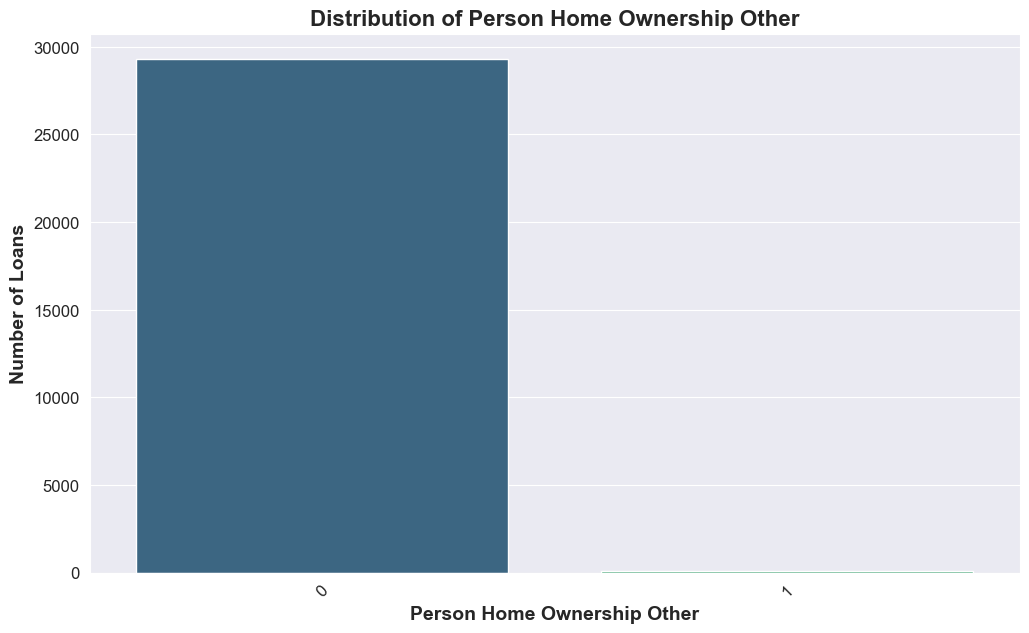

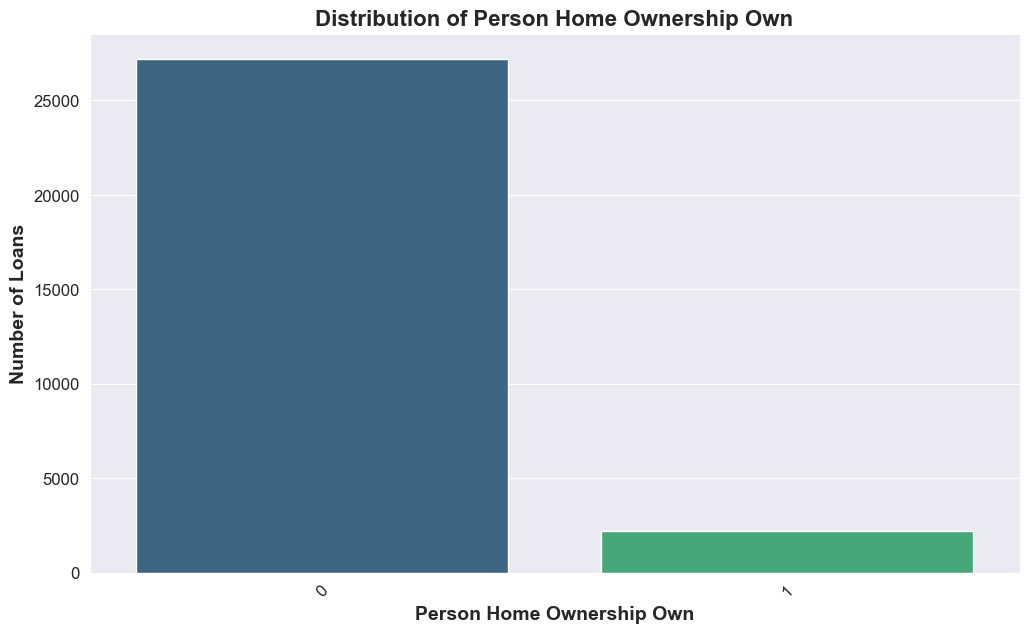

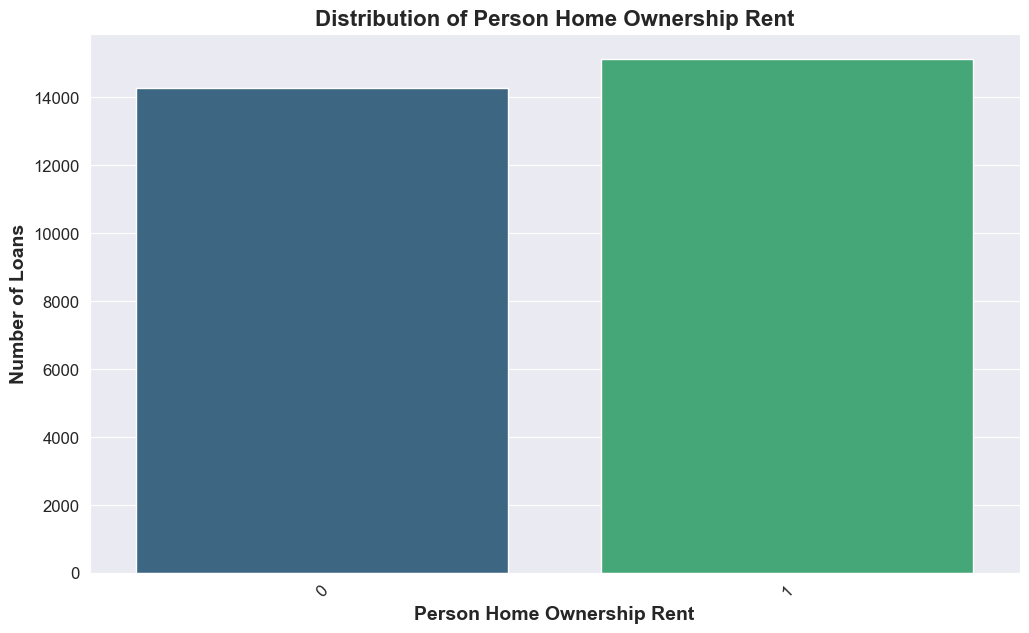

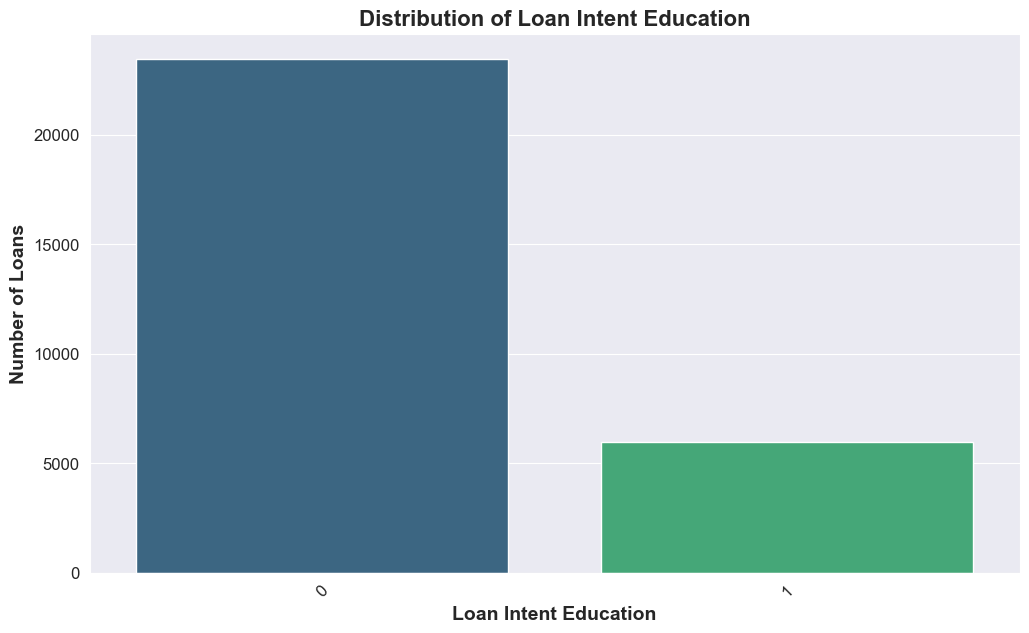

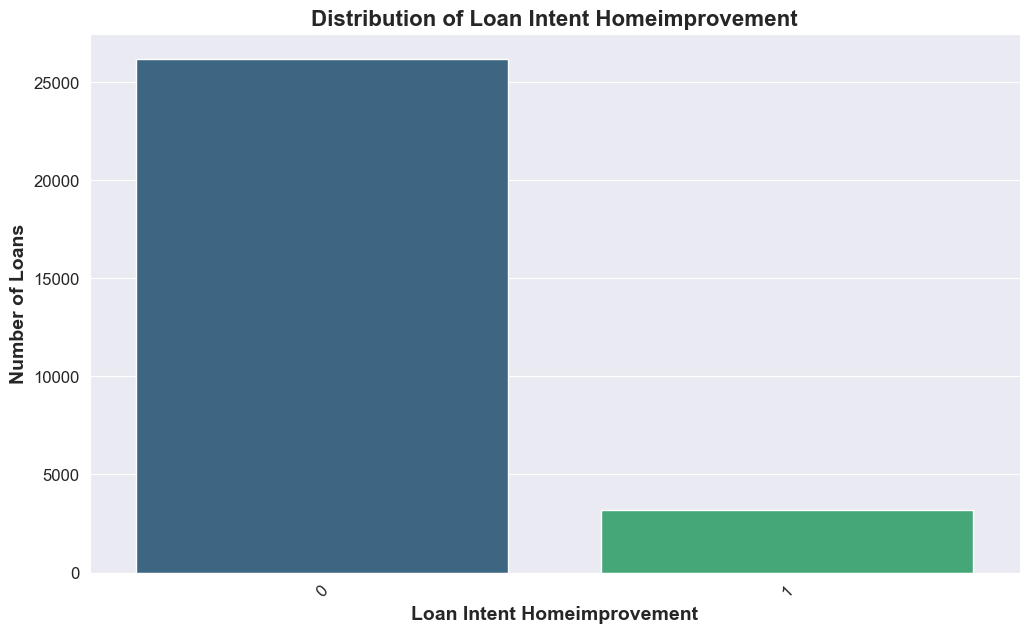

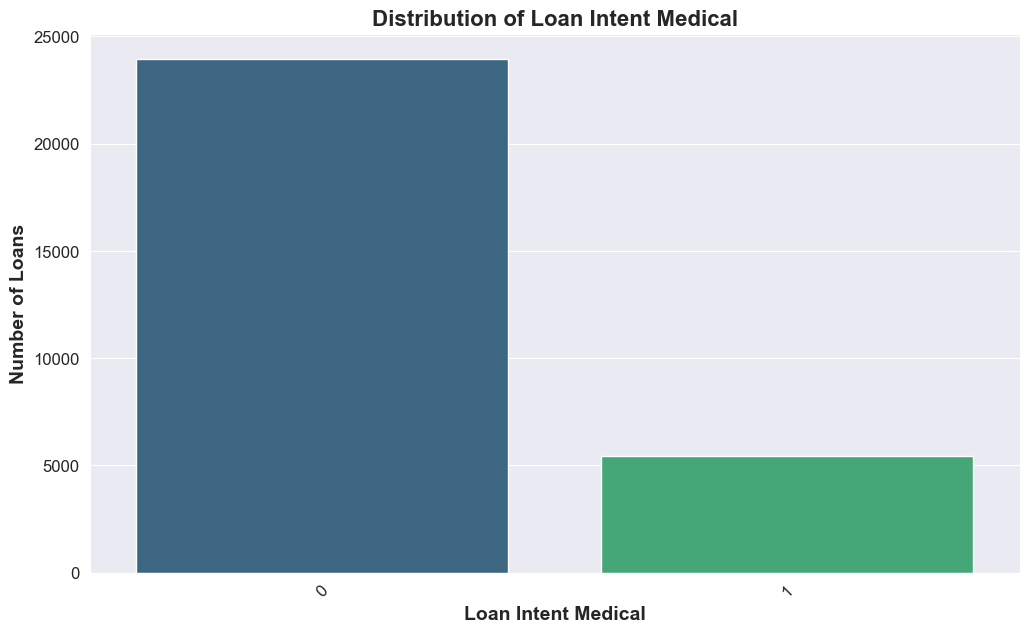

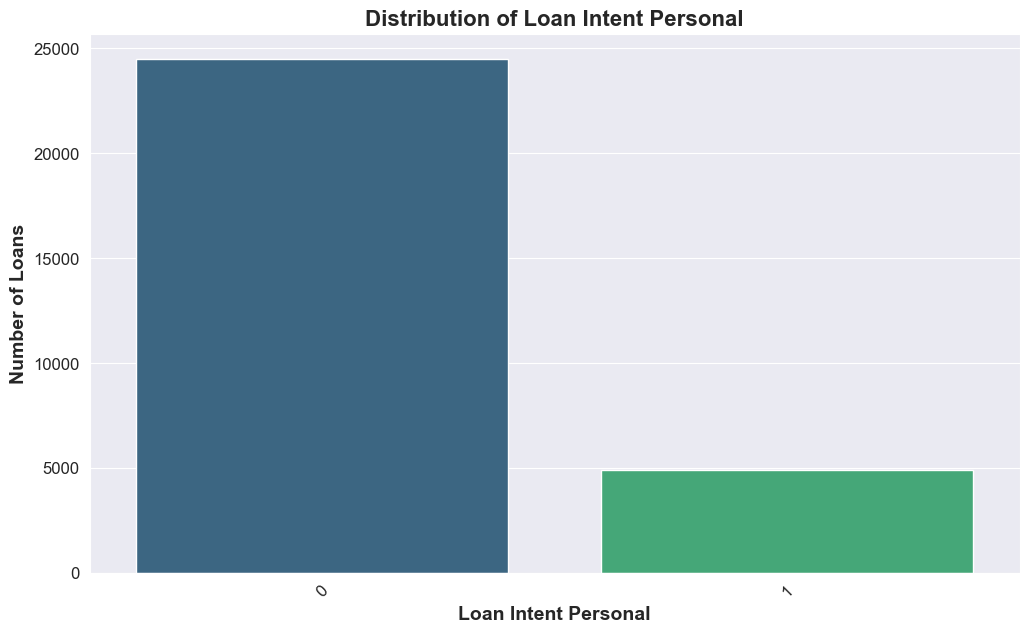

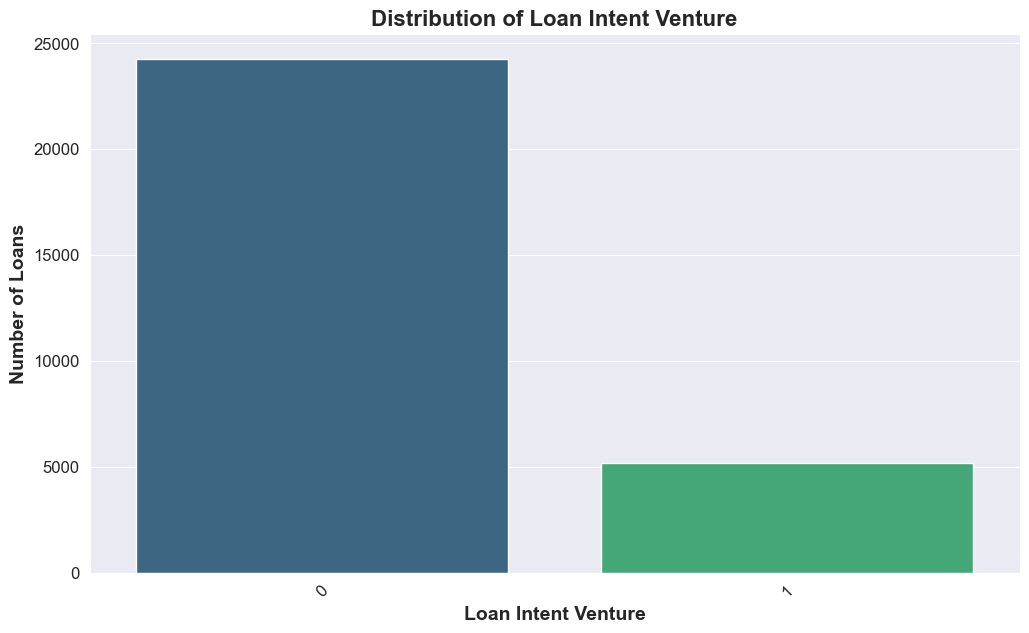

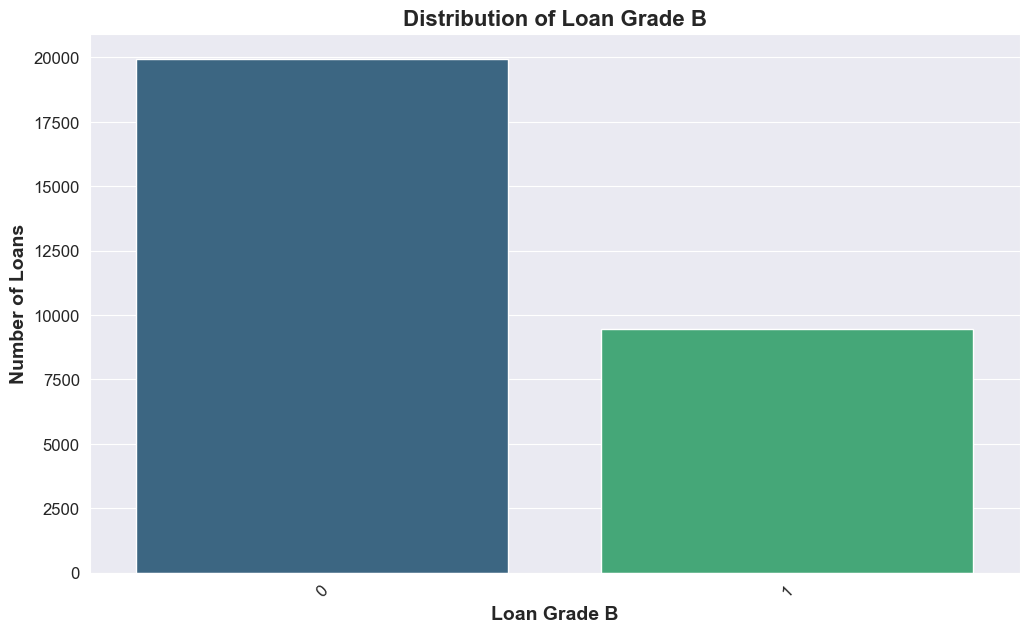

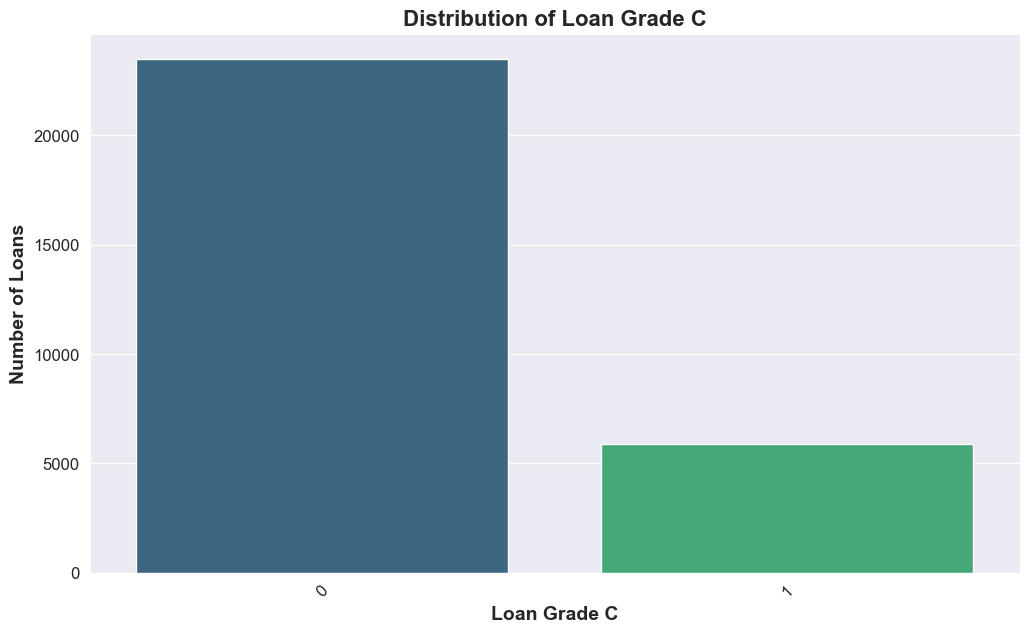

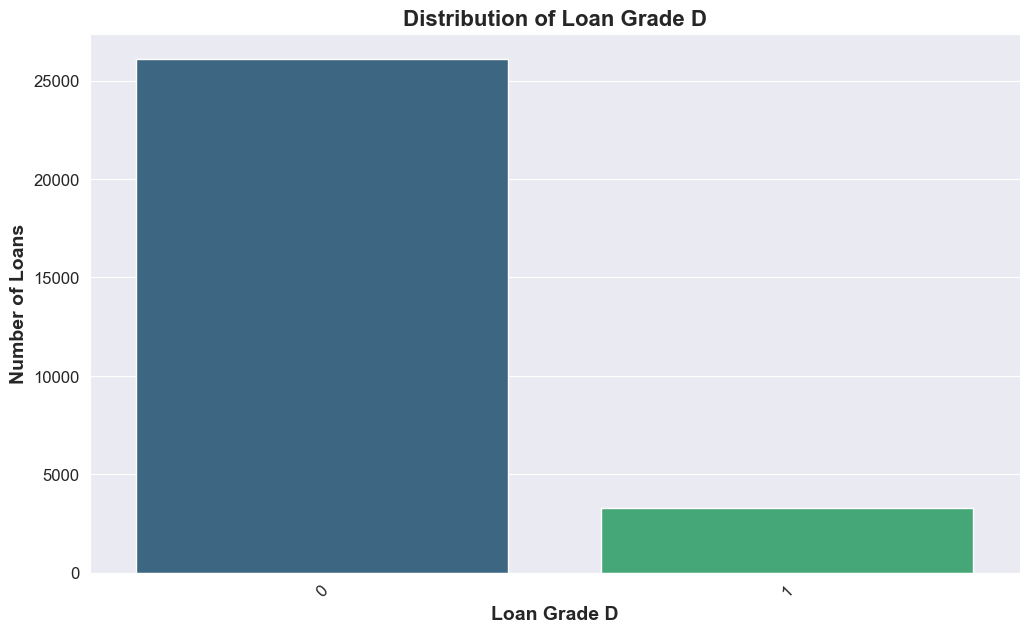

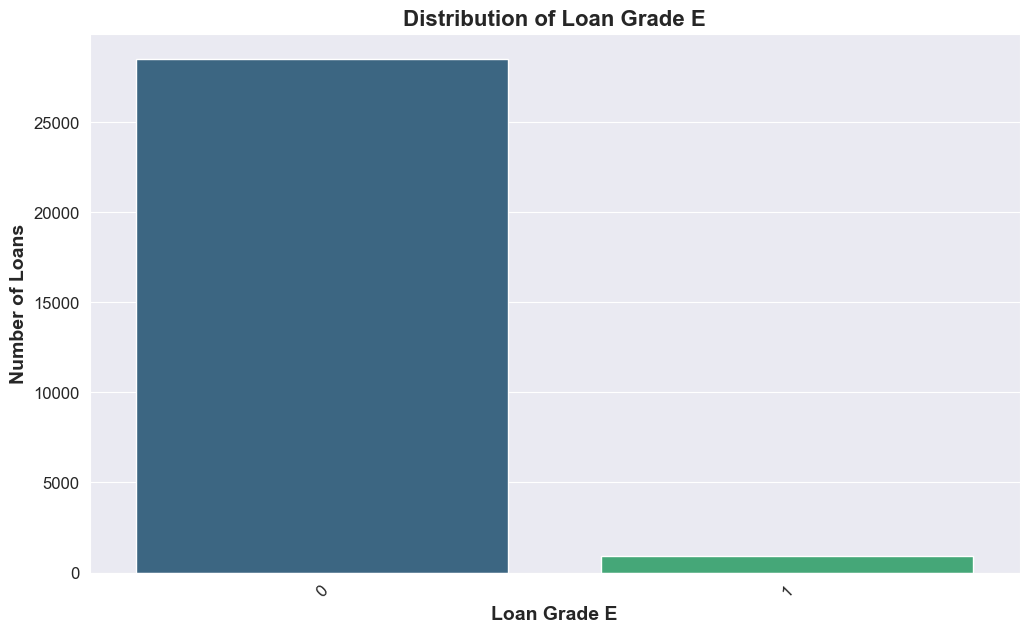

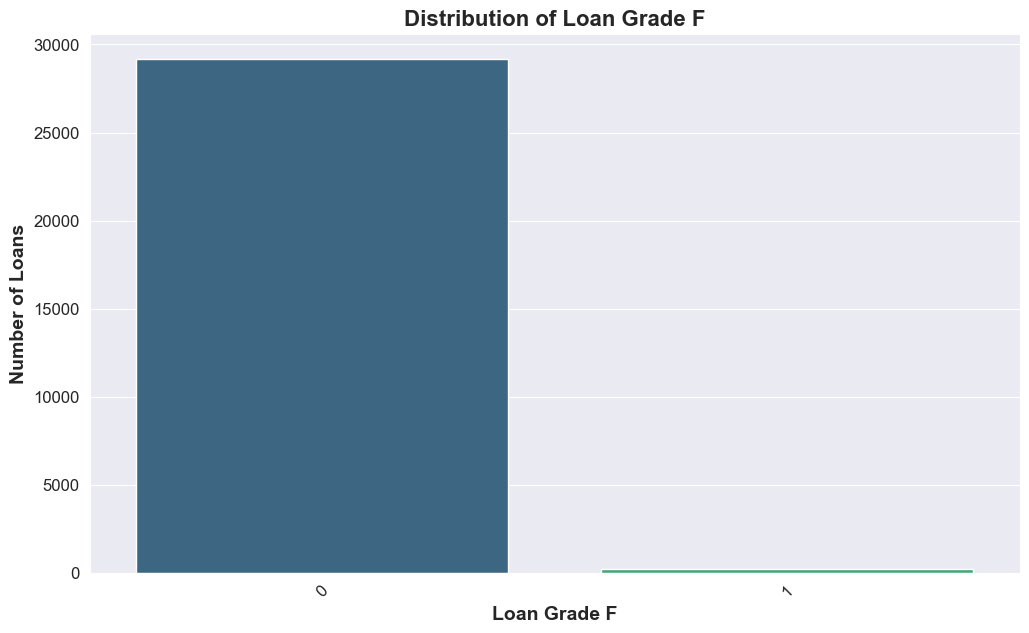

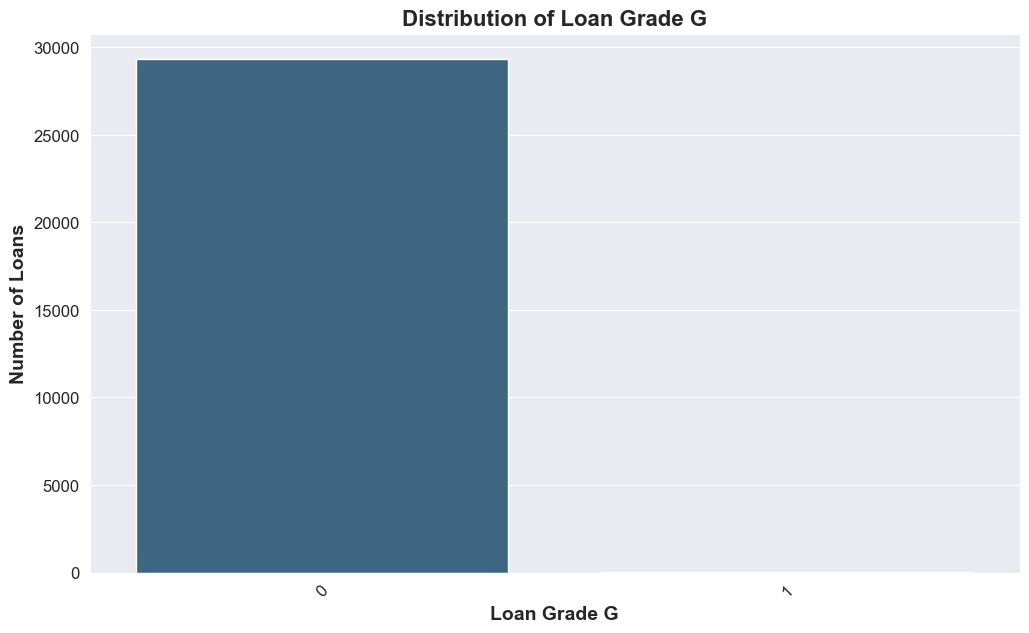

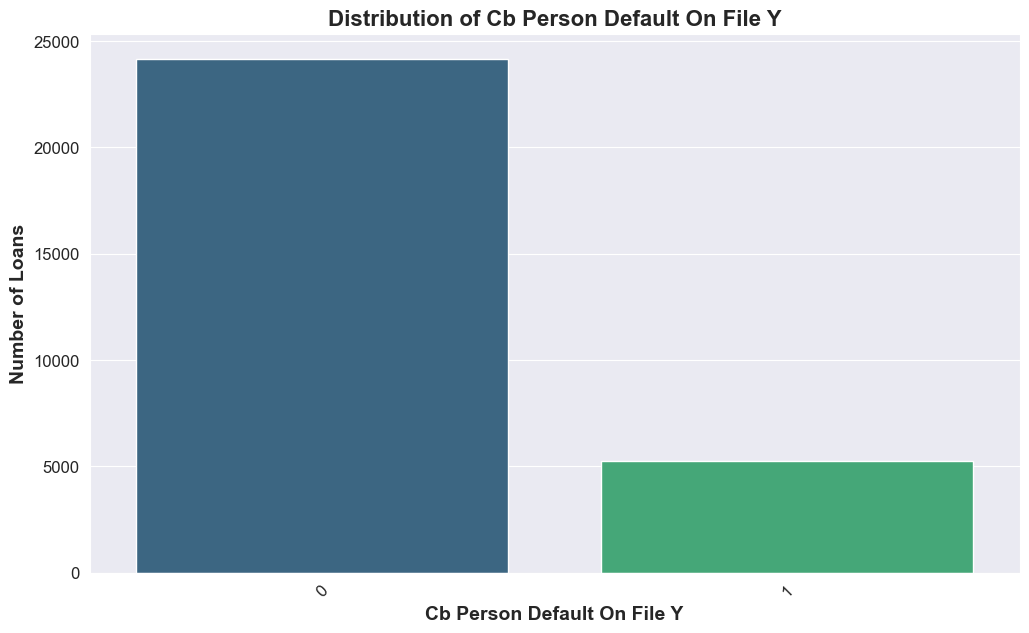

In [29]:
base_categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

one_hot_columns = [col for col in df.columns if any(base_feature in col for base_feature in base_categorical_features)]

for feature in one_hot_columns:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=feature, palette='viridis')
    
    plt.title(f"Distribution of {feature.replace('_', ' ').title()}", fontweight='bold', fontsize=16)
    plt.xlabel(feature.replace('_', ' ').title(), fontweight='bold', fontsize=14)
    plt.ylabel('Number of Loans', fontweight='bold', fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.show()

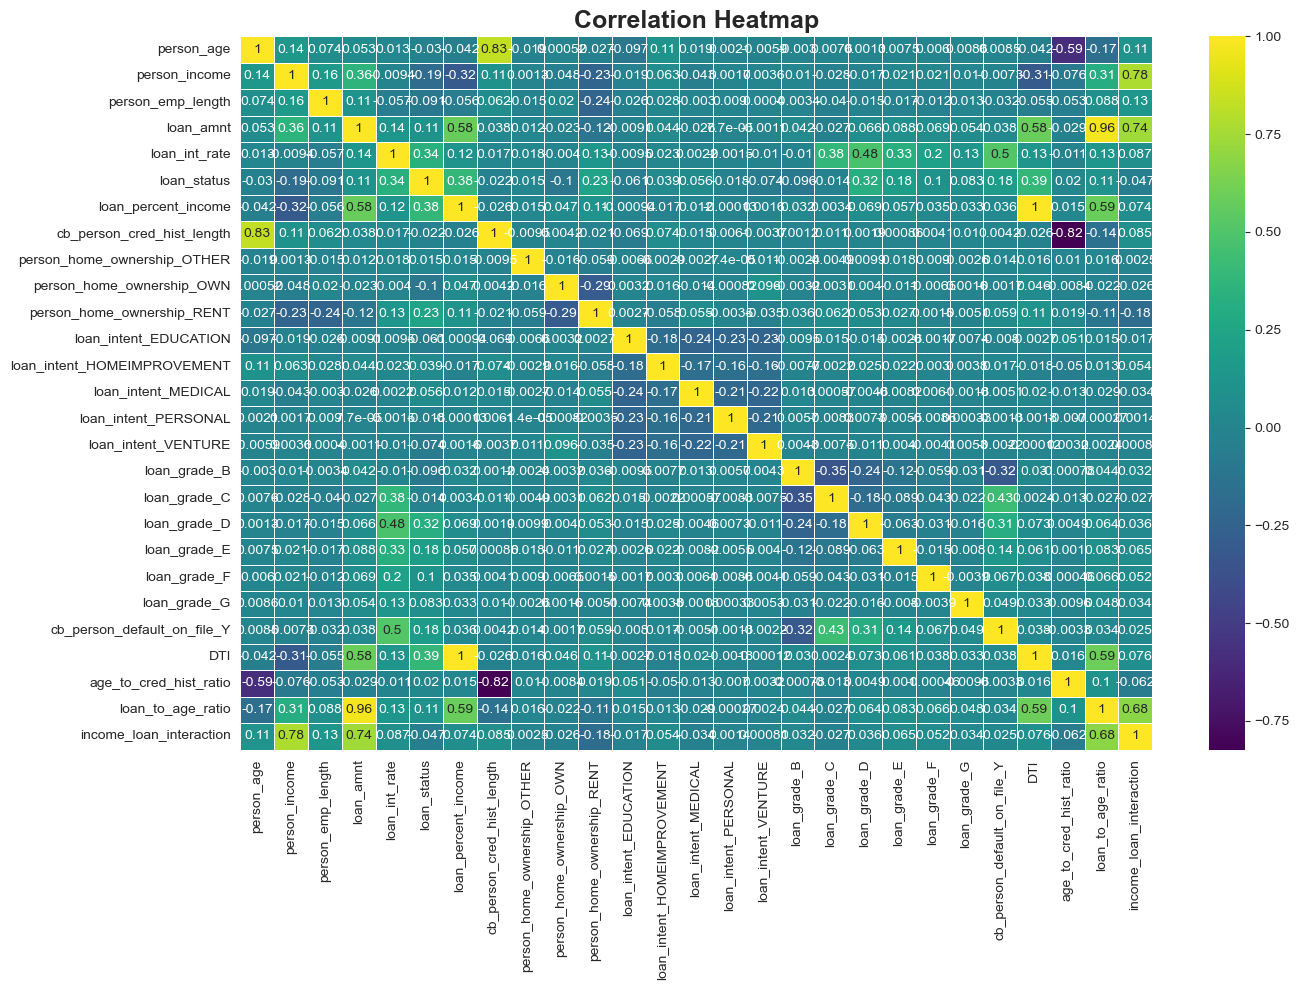

In [30]:
plt.figure(figsize=(14, 10))

sns.heatmap(df.corr(), cmap="viridis", annot=True, linewidths=.5, annot_kws={"size": 10})

plt.title('Correlation Heatmap', fontweight='bold', fontsize=18)
plt.tight_layout()
plt.show()


In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

imputer = SimpleImputer(strategy='mean')
df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']] = imputer.fit_transform(df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']])

if len(df['person_age'].shape) > 1:
    df['person_age'] = df['person_age'].iloc[:, 0]

def drop_duplicate_columns(df):
    """
    This function drops duplicate columns from a DataFrame.
    """
    duplicates = df.columns[df.columns.duplicated(keep='first')]
    return df.drop(columns=duplicates)

df = df.reset_index(drop=True)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']])
poly_columns = poly.get_feature_names_out()

df_poly = pd.DataFrame(poly_data, columns=poly_columns)
df = pd.concat([df, df_poly], axis=1)

df = drop_duplicate_columns(df)

print(df.head())


   person_emp_length  loan_status  loan_percent_income  \
0                5.0            0                 0.10   
1                1.0            1                 0.57   
2                4.0            1                 0.53   
3                8.0            1                 0.55   
4                2.0            1                 0.25   

   cb_person_cred_hist_length  person_home_ownership_OTHER  \
0                           2                            0   
1                           3                            0   
2                           2                            0   
3                           4                            0   
4                           2                            0   

   person_home_ownership_OWN  person_home_ownership_RENT  \
0                          1                           0   
1                          0                           0   
2                          0                           1   
3                          0          

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


KeyError: 'loan_int_rate'

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

# Making predictions with the Random Forest model
y_pred_rf_train = rf.predict(X_train_scaled)
y_pred_rf_test = rf.predict(X_test_scaled)

# Evaluating the Random Forest model
print("Random Forest Training Accuracy:", accuracy_score(y_train, y_pred_rf_train))
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf_test))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_rf_test))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_test))


Random Forest Training Accuracy: 0.9999513713285353
Random Forest Test Accuracy: 0.9240980258679373

Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      6926
           1       0.93      0.70      0.80      1888

    accuracy                           0.92      8814
   macro avg       0.93      0.84      0.88      8814
weighted avg       0.92      0.92      0.92      8814


Test Confusion Matrix:
 [[6832   94]
 [ 575 1313]]


In [36]:
importances = rf.feature_importances_
features = X.columns  # Adjust this if your input features are in a different variable
sorted_indices = np.argsort(importances)[::-1]

# Displaying the top features
print("\nFeature Importance:")
for i in range(10):  # displaying top 10 features; adjust accordingly
    print(f"{features[sorted_indices[i]]}: {importances[sorted_indices[i]]}")



Feature Importance:
DTI: 0.11675004194626563
loan_int_rate^2: 0.10201904310328108
loan_percent_income: 0.08861691010836281
person_age loan_int_rate: 0.06436690945376682
person_income^2: 0.06399328115670515
person_age person_income: 0.05615226894275107
loan_grade_D: 0.04835585651210463
person_income loan_int_rate: 0.04376965209432449
person_home_ownership_RENT: 0.04089443077119845
loan_amnt loan_int_rate: 0.039254916114371735


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Resetting the index
df = df.reset_index(drop=True)

# Splitting the data
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

# Making Predictions
y_pred_rf_train = rf.predict(X_train_scaled)
y_pred_rf_test = rf.predict(X_test_scaled)

# Evaluating the model
print("Random Forest Training Accuracy:", accuracy_score(y_train, y_pred_rf_train))
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf_test))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_rf_test))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_test))

# Feature Importances
importances = rf.feature_importances_
features = X.columns  
sorted_indices = np.argsort(importances)[::-1]

# Displaying the top features
print("\nFeature Importance:")
for i in range(10):  # displaying top 10 features; adjust accordingly
    print(f"{features[sorted_indices[i]]}: {importances[sorted_indices[i]]}")


Random Forest Training Accuracy: 0.9999513713285353
Random Forest Test Accuracy: 0.9240980258679373

Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      6926
           1       0.93      0.70      0.80      1888

    accuracy                           0.92      8814
   macro avg       0.93      0.84      0.88      8814
weighted avg       0.92      0.92      0.92      8814


Test Confusion Matrix:
 [[6832   94]
 [ 575 1313]]

Feature Importance:
DTI: 0.11675004194626563
loan_int_rate^2: 0.10201904310328108
loan_percent_income: 0.08861691010836281
person_age loan_int_rate: 0.06436690945376682
person_income^2: 0.06399328115670515
person_age person_income: 0.05615226894275107
loan_grade_D: 0.04835585651210463
person_income loan_int_rate: 0.04376965209432449
person_home_ownership_RENT: 0.04089443077119845
loan_amnt loan_int_rate: 0.039254916114371735
